In [186]:
from spacy.en import English
from spacy.symbols import nsubj, VERB
from pattern.en import conjugate, PAST, PRESENT, tenses, parse, pprint, parsetree, SINGULAR, PLURAL
from itertools import tee
import string
from HTMLParser import HTMLParser

In [2]:
from_tense = 'past'
to_tense = 'present'

from_tense_lookup = {
    'past':'VBD',
    'present':'VBP',
    'future':'VB'
}
form_key = from_tense_lookup[from_tense]


to_tense_lookup = {
    'present' : PRESENT,
    'past' : PAST
}
to_key = to_tense_lookup[to_tense]

    


In [ ]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [41]:
def change_tense(text, to_tense):
    sentences = parse(text).split()
    out = []
    for sentence in sentences:
        out.append(sentence[0][0])
        for word_pair in pairwise(sentence):
            if (word_pair[0][0] == 'will' and word_pair[1][1] == 'VB') \
            or word_pair[1][1] == 'VBD' or word_pair[1][1] == 'VBP':
                if to_tense == 'present':
                    out.append(conjugate(word_pair[1][0],tense=PRESENT))
                elif to_tense == 'past':
                    out.append(conjugate(word_pair[1][0],tense=PAST))
                elif to_tense == 'future':
                    out.append('will')
                    out.append(conjugate(word_pair[1][0],'inf'))
            elif word_pair[1][0] == 'will'and word_pair[1][1] == 'MD':
                pass
            else:
                out.append(word_pair[1][0])

    text_out = ' '.join(out)
    
    for char in string.punctuation:
        if char in """(<['‘""":
            text_out = text_out.replace(char+' ',char)
        else:
            text_out = text_out.replace(' '+char,char)

    text_out = text_out.replace(" 's","'s") #fix posessive 's
    
    #unicode(text_out).replace("""‘ """, """‘""")
    return text_out


In [198]:
text = u"Alice was beginning to get very tired of sitting by her sister \
on the bank and of having nothing to do: once or twice she had \
peeped into the book her sister was reading, but it had no pictures \
or conversations in it, ‘and what is the use of a book,’ thought \
Alice ‘without pictures or conversations?’ So she was considering \
in her own mind (as well as she could, for the hot day made her feel \
very sleepy and stupid), whether the pleasure of making a daisy-chain \
would be worth the trouble of getting up and picking the daisies, when \
suddenly White Rabbit with pink eyes ran close by her."
print HTMLParser().unescape(text)

Alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, ‘and what is the use of a book,’ thought Alice ‘without pictures or conversations?’ So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly White Rabbit with pink eyes ran close by her.


In [180]:
print(change_tense(text,"present"))

Alice is beginning to get very tired of sitting by her sister on the bank and of having nothing to do: once or twice she has peeped into the book her sister is reading, but it has no pictures or conversations in it, ‘ and what is the use of a book, ’ thought Alice ‘ without pictures or conversations? ’ So she is considering in her own mind (as well as she could, for the hot day makes her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly White Rabbit with pink eyes runs close by her.


Here 'thought' was not changed. Let's check if it was labeled as a noun.

In [181]:
sentences = parse(text).split()
[x for x in sentences[0] if x[0] == 'thought']

[[u'thought', u'JJ', u'I-NP', u'O']]

Yup, it's labeled as a noun phrase (NP). Let's try the spaCy parser.

In [182]:
nlp = English()
doc=nlp(text)
[x for x in list(doc.sents)[0] if x.text == 'thought'][0].tag_

u'VBD'

Well that's good, spaCy got it right! Let's build the same parser, but using spaCy instead of pattern.

In [191]:
def change_tense_spaCy(text, to_tense):
    
    doc = nlp(unicode(text))
    
    out = []
    out.append(doc[0].text)
    for word_pair in pairwise(doc):
        if (word_pair[0].string == 'will' and word_pair[1].pos_ == u'VERB') \
        or word_pair[1].tag_ == u'VBD' or word_pair[1].tag_ == u'VBP':
            if to_tense == 'present':
                out.append(conjugate(word_pair[1].text, PRESENT))
            elif to_tense == 'past':
                out.append(conjugate(word_pair[1].text, PAST))
            elif to_tense == 'future':
                out.append('will')
                out.append(conjugate(word_pair[1].text, 'inf'))

            elif word_pair[1].text == 'will' and word_pair[1].tag_ == 'MD':
                pass
        else:
            out.append(word_pair[1].text)


    text_out = ' '.join(out)

    for char in string.punctuation:
        if char in """(<['‘""":
            text_out = text_out.replace(char+' ',char)
        else:
            text_out = text_out.replace(' '+char,char)

    text_out = text_out.replace(" 's","'s") #fix posessive 's
    
    return text_out
        

In [192]:
print(change_tense_spaCy(text, 'present'))

Alice is beginning to get very tired of sitting by her sister on the bank and of having nothing to do: once or twice she has peeped into the book her sister is reading, but it has no pictures or conversations in it, ‘ and what is the use of a book,’ thinks Alice ‘ without pictures or conversations?’ So she is considering in her own mind (as well as she could, for the hot day makes her feel very sleepy and stupid), whether the pleasure of making a daisy- chain would be worth the trouble of getting up and picking the daisies, when suddenly White Rabbit with pink eyes runs close by her.


In [185]:
print(change_tense_spaCy(text,"future"))

Alice will be beginning to get very tired of sitting by her sister on the bank and of having nothing to do: once or twice she will have peeped into the book her sister will be reading, but it will have no pictures or conversations in it, ‘ and what is the use of a book,’ will think Alice ‘ without pictures or conversations?’ So she will be considering in her own mind (as well as she could, for the hot day will make her feel very sleepy and stupid), whether the pleasure of making a daisy- chain would be worth the trouble of getting up and picking the daisies, when suddenly White Rabbit with pink eyes will run close by her.


Looking good! However, it will fail if we make the following change to the last sentence:

In [163]:
text = "White rabbits with pink eyes ran close by her."
change_tense_spaCy(text, 'present')

u'White rabbits with pink eyes runs close by her.'

This fails because the verb "ran" confujates to "runs" if the subject is singular, but conjugates to "run" if the subject is plural. To fix this, we'll have to figure out a way to tell the verb the number of its subject.

In [195]:
from spacy.symbols import NOUN

SUBJ_DEPS = {'agent', 'csubj', 'csubjpass', 'expl', 'nsubj', 'nsubjpass'}

def _get_conjuncts(tok):
    """
    Return conjunct dependents of the leftmost conjunct in a coordinated phrase,
    e.g. "Burton, [Dan], and [Josh] ...".
    """
    return [right for right in tok.rights
            if right.dep_ == 'conj']

def is_plural_noun(token):
    """
    Returns True if token is a plural noun, False otherwise.

    Args:
        token (``spacy.Token``): parent document must have POS information

    Returns:
        bool
    """
    if token.doc.is_tagged is False:
        raise ValueError('token is not POS-tagged')
    return True if token.pos == NOUN and token.lemma != token.lower else False

def get_subjects_of_verb(verb):
    """Return all subjects of a verb according to the dependency parse."""
    subjs = [tok for tok in verb.lefts
             if tok.dep_ in SUBJ_DEPS]
    # get additional conjunct subjects
    subjs.extend(tok for subj in subjs for tok in _get_conjuncts(subj))
    return subjs

def is_plural_verb(token):
    if token.doc.is_tagged is False:
        raise ValueError('token is not POS-tagged')
    subjects = get_subjects_of_verb(token)
    plural_score = sum([is_plural_noun(x) for x in subjects])/len(subjects)
    
    return plural_score > .5


In [175]:
conjugate??

In [199]:
def change_tense_spaCy(text, to_tense):
    
    doc = nlp(unicode(text))
    
    out = []
    out.append(doc[0].text)
    for word_pair in pairwise(doc):
        if (word_pair[0].string == 'will' and word_pair[1].pos_ == u'VERB') \
        or word_pair[1].tag_ == u'VBD' or word_pair[1].tag_ == u'VBP':
            if to_tense == 'present':
                if is_plural_verb(word_pair[1]):
                    out.append(conjugate(word_pair[1].text, PRESENT, None, PLURAL))
                else:
                    out.append(conjugate(word_pair[1].text, PRESENT))
            elif to_tense == 'past':
                out.append(conjugate(word_pair[1].text, PAST))
            elif to_tense == 'future':
                out.append('will')
                out.append(conjugate(word_pair[1].text, 'inf'))

            elif word_pair[1].text == 'will' and word_pair[1].tag_ == 'MD':
                pass
        else:
            out.append(word_pair[1].text)


    text_out = ' '.join(out)

    for char in string.punctuation:
        if char in """(<['‘""":
            text_out = text_out.replace(char+' ',char)
        else:
            text_out = text_out.replace(' '+char,char)

    text_out = text_out.replace(" 's","'s") #fix posessive 's
    
    return text_out

In [202]:
text_plural_check = "Rabbits with white fur ran close by her."
change_tense_spaCy(text_plural_check, 'present')

u'Rabbits with white fur run close by her.'

In [ ]:
nlp = English()
sent = u"I was shooting an elephant"
doc=nlp(sent)

sub_toks = [tok for tok in doc if (tok.dep_ == "nsubj") ]

print(sub_toks) 

# Finding a verb with a subject from below — good
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add((possible_subject, possible_subject.head))
        
verbs

In [15]:
text2 = "We will see about that"

In [16]:
sentences = parse(text2).split()

In [17]:
sentences

[[[u'We', u'PRP', u'B-NP', u'O'],
  [u'will', u'MD', u'B-VP', u'O'],
  [u'see', u'VB', u'I-VP', u'O'],
  [u'about', u'IN', u'B-PP', u'O'],
  [u'that', u'DT', u'O', u'O']]]

In [18]:
pprint(parsetree("I walk to the store"))

          WORD   TAG    CHUNK   ROLE   ID     PNP    LEMMA   
                                                             
             I   PRP    NP      -      -      -      -       
          walk   VBP    VP      -      -      -      -       
            to   TO     -       -      -      -      -       
           the   DT     NP      -      -      -      -       
         store   NN     NP ^    -      -      -      -       


In [19]:
pairwise(sentences[0])[0]

([u'We', u'PRP', u'B-NP', u'O'], [u'will', u'MD', u'B-VP', u'O'])

In [20]:
parse("I will walk").split()

[[[u'I', u'PRP', u'B-NP', u'O'],
  [u'will', u'MD', u'B-VP', u'O'],
  [u'walk', u'VB', u'I-VP', u'O']]]

In [204]:

text2 = """Dr. Dichter's interest in community psychiatry began as a fourth year resident when he and a co-resident ran a psychiatric inpatient and outpatient program at Fort McCoy Wisconsin treating formally institutionalized chronically mentally ill Cuban refugees from the Mariel Boatlift.  He came to Philadelphia to provide short-term inpatient treatment, alleviating emergency room congestion.  There he first encountered the problems of homelessness and was particularly interested in the relationship between the homeless and their families.  Dr. Dichter has been the Director of an outpatient department and inpatient unit, as well as the Director of Family Therapy at AEMC.  His work with families focused on the impact of chronic mental illness on the family system.  He was the first Medical Director for a Medicaid Managed Care Organization and has consulted with SAMHSA, CMS and several states assisting them to monitor access and quality of care for their public patients.  He currently is the Medical Director for Pathways to Housing PA, where he has assists chronically homeless to maintain stable housing and recover from the ravages of mental illness and substance abuse."""
text2

"Dr. Dichter's interest in community psychiatry began as a fourth year resident when he and a co-resident ran a psychiatric inpatient and outpatient program at Fort McCoy Wisconsin treating formally institutionalized chronically mentally ill Cuban refugees from the Mariel Boatlift.  He came to Philadelphia to provide short-term inpatient treatment, alleviating emergency room congestion.  There he first encountered the problems of homelessness and was particularly interested in the relationship between the homeless and their families.  Dr. Dichter has been the Director of an outpatient department and inpatient unit, as well as the Director of Family Therapy at AEMC.  His work with families focused on the impact of chronic mental illness on the family system.  He was the first Medical Director for a Medicaid Managed Care Organization and has consulted with SAMHSA, CMS and several states assisting them to monitor access and quality of care for their public patients.  He currently is the M

In [209]:
change_tense_spaCy(text2,'future')

u"Dr. Dichter's interest in community psychiatry will begin as a fourth year resident when he and a co- resident will run a psychiatric inpatient and outpatient program at Fort McCoy Wisconsin treating formally institutionalized chronically mentally ill Cuban refugees from the Mariel Boatlift.   He will come to Philadelphia to provide short- term inpatient treatment, alleviating emergency room congestion.   There he first will encounter the problems of homelessness and will be particularly interested in the relationship between the homeless and their families.   Dr. Dichter has been the Director of an outpatient department and inpatient unit, as well as the Director of Family Therapy at AEMC.   His work with families focused on the impact of chronic mental illness on the family system.   He will be the first Medical Director for a Medicaid Managed Care Organization and has consulted with SAMHSA, CMS and several states assisting them to monitor access and quality of care for their publi

In [18]:
s = parsetree(text2,relations=True)[0]
' '.join([chunk.string for chunk in s.chunks])

u'Dr. Dichter interest in community psychiatry began as a fourth year resident he and a co-resident ran a psychiatric inpatient outpatient program at Fort McCoy Wisconsin treating formally institutionalized chronically mentally ill Cuban refugees from the Mariel Boatlift'

In [19]:
s.string

u"Dr. Dichter 's interest in community psychiatry began as a fourth year resident when he and a co-resident ran a psychiatric inpatient and outpatient program at Fort McCoy Wisconsin treating formally institutionalized chronically mentally ill Cuban refugees from the Mariel Boatlift ."

In [20]:
conjugate('focussed','inf',parse=False)

u'focus'

In [21]:
tenses('focused')

[('past', None, None, 'indicative', 'imperfective'),
 ('past', None, None, 'indicative', 'progressive'),
 ('past', None, 'plural', 'indicative', 'imperfective'),
 ('past', 1, 'plural', 'indicative', 'imperfective'),
 ('past', 1, 'singular', 'indicative', 'imperfective'),
 ('past', 2, 'plural', 'indicative', 'imperfective'),
 ('past', 2, 'singular', 'indicative', 'imperfective'),
 ('past', 3, 'plural', 'indicative', 'imperfective'),
 ('past', 3, 'singular', 'indicative', 'imperfective')]

In [65]:
from stat_parser import Parser
parser = Parser()

Building the Grammar Model
Time: (7.17)s

(SBARQ
  (WHADVP (WRB how))
  (SQ
    (MD can)
    (NP
      (NP (DT the) (JJ net) (NN amount))
      (PP
        (IN of)
        (NP
          (NP (NNS entropy))
          (PP (IN of) (NP (DT the) (NN universe))))))
    (VP (VB be) (ADJP (RB massively) (VBN decreased))))
  (. ?))


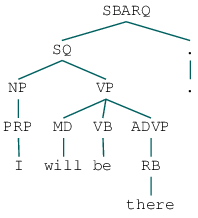

In [220]:
text = "He came to Philadelphia to provide short-term inpatient treatment, alleviating emergency room congestion."
text = "I will be there."
result =  parser.parse(text)
result

In [229]:
sentence = result
LABELS = [x._label for x in sentence[0]]

vps = [x for x in sentence[0] if x._label == 'VP']
#verbs = x for x in vps


In [180]:
WORDS,POS = zip(*result.pos())

In [230]:
vps[0].pos()

[('will', u'MD'), ('be', u'VB'), ('there', u'RB')]

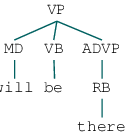

In [231]:
vps[0]

In [162]:
doc

Suddenly white rabbits with pink eyes ran close by her.

[]

In [ ]:
#fix formatting
import string



##TODO: fix spacing around single and double quotes